In [1]:
import numpy as np
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
print("Shape of train set:", train.shape)
print("Shape of test set:", test.shape)

Shape of train set: (21802, 4)
Shape of test set: (6099, 2)


In [3]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21802 entries, 0 to 21801
Data columns (total 4 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0                                                         21802 non-null  int64 
 1   id                                                    21802 non-null  int64 
 2   text                                                  21802 non-null  object
 3   sentiment                                             21802 non-null  object
dtypes: int64(2), object(2)
memory usage: 681.4+ KB
None


In [4]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6099 entries, 0 to 6098
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6099 non-null   int64 
 1   text    6099 non-null   object
dtypes: int64(1), object(1)
memory usage: 95.4+ KB
None


In [5]:
print(train.isnull().any())

                                                        False
id                                                      False
text                                                    False
sentiment                                               False
dtype: bool


In [6]:
print(test.isnull().any())

id      False
text    False
dtype: bool


In [7]:
train[train['sentiment'] == 'neutral'].head()

,,id,text,sentiment
0,2,805582613687713000,doctors hit campaign trail as race to medical...,neutral
2,4,641096279930507000,i just found out naruto didn't become the 5th...,neutral
3,5,625730917647126000,"""prince george reservist who died saturday ju...",neutral
7,9,802160431683031000,today is the international day for the elimin...,neutral
8,10,636309350701658000,"""in his first game back since april 14, david...",neutral


In [8]:
train[train['sentiment'] == 'negative'].head()

,,id,text,sentiment
14,19,802361154932768000,@rafalhill @dumptrump22 they will pay for thi...,negative
15,20,665361065090416000,stop posting this picture. it's from january ...,negative
24,35,805671581636825000,from death to death. no where else to go. #al...,negative
48,63,802394868697956000,@joannahausmann we now wait for maduro's turn,negative
54,70,802203589586337000,the cheeto nazi is mad that is fat ass looks ...,negative


In [9]:
train[train['sentiment'] == 'positive'].head()

,,id,text,sentiment
1,3,637480203497832000,is anybody going to the radio station tomorro...,positive
4,6,633292370906230000,season in the sun versi nirvana rancak gak..s...,positive
5,7,676475014070337000,if i didnt have you i'd never see the sun. #m...,positive
6,8,802175075067763000,this is cute. #thisisus @nbcthisisus https://...,positive
12,17,636867553399341000,my 8 hour shift will consist of me thinking a...,positive


<AxesSubplot:>

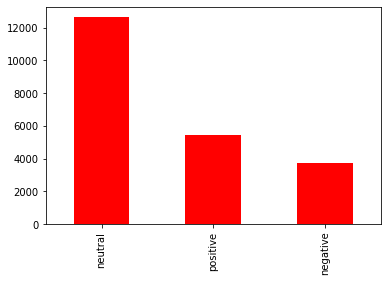

In [10]:
train_sentiment_value_count = train['sentiment'].value_counts()
# fig = plt.figure(6,4)
# plt.plot.bar(train_sentiment_value_count, color='red', figsize = (6,4))
# plt.show()
train_sentiment_value_count.plot.bar(color = 'red', figsize = (6, 4))

<AxesSubplot:ylabel='Frequency'>

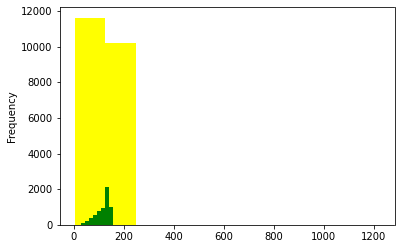

In [11]:
train_len = train['text'].str.len()
test_len = test['text'].str.len()
train_len.plot.hist(color='yellow', figsize=(6,4))
test_len.plot.hist(color = 'green', figsize=(6,4))
# print(train_len, test_len)

<AxesSubplot:ylabel='Frequency'>

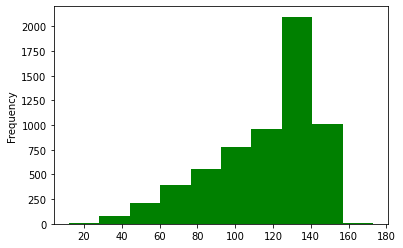

In [12]:
test_len.plot.hist(color = 'green', figsize=(6,4))

In [13]:
train['len_text'] = train['text'].str.len()
test['len_text'] = test['text'].str.len()

In [14]:
train.head(10) 

,,id,text,sentiment,len_text
0,2,805582613687713000,doctors hit campaign trail as race to medical...,neutral,109
1,3,637480203497832000,is anybody going to the radio station tomorro...,positive,138
2,4,641096279930507000,i just found out naruto didn't become the 5th...,neutral,58
3,5,625730917647126000,"""prince george reservist who died saturday ju...",neutral,122
4,6,633292370906230000,season in the sun versi nirvana rancak gak..s...,positive,60
5,7,676475014070337000,if i didnt have you i'd never see the sun. #m...,positive,64
6,8,802175075067763000,this is cute. #thisisus @nbcthisisus https://...,positive,61
7,9,802160431683031000,today is the international day for the elimin...,neutral,142
8,10,636309350701658000,"""in his first game back since april 14, david...",neutral,136
9,11,623343242826743000,josh hamilton flies out to center... we are g...,neutral,102


In [15]:
train.groupby('sentiment').describe()

\
                                                         count          mean   
sentiment                                                                      
negative                                              3715.0    13254.372275   
neutral                                              12659.0    14328.857967   
positive                                              5428.0    13482.280951   

                                                                       id  \
                   std   min     25%      50%       75%      max    count   
sentiment                                                                   
negative   7954.252312  19.0  6448.0  12903.0  19334.00  27896.0   3715.0   
neutral    8072.791063   2.0  7265.5  14722.0  21681.50  27899.0  12659.0   
positive   7993.417669   3.0  6650.0  13155.5  19710.25  27900.0   5428.0   

                         ...                             len_text              \
                   mean  ...           75%           max    count        mean   
sentiment                ...                                                    
negative   7.321447e+17  ...  8.023710e+17  8.057249e+17   3715.0  119.708479   
neutral    7.013029e+17  ...  8.021915e+17  8.057242e+17  12659.0  114.396161   
positive   6.828693e+17  ...  7.996346e+17  8.057232e+17   5428.0  111.962970   

                                                         
                 std   min    25%    50%    75%     max  
sentiment                                                
negative   26.538464  10.0  105.0  131.0  140.0   448.0  
neutral    29.817116   5.0   95.0  123.0  138.0  1222.0  
positive   28.523081  18.0   91.0  119.0  137.0   161.0  

[3 rows x 24 columns]

In [16]:
train.groupby('len_text')
train.head()

,,id,text,sentiment,len_text
0,2,805582613687713000,doctors hit campaign trail as race to medical...,neutral,109
1,3,637480203497832000,is anybody going to the radio station tomorro...,positive,138
2,4,641096279930507000,i just found out naruto didn't become the 5th...,neutral,58
3,5,625730917647126000,"""prince george reservist who died saturday ju...",neutral,122
4,6,633292370906230000,season in the sun versi nirvana rancak gak..s...,positive,60


In [17]:
# for i in range(len(train['sentiment'])):
#     if train['sentiment'][i] == 'positive':
#         train['sentiment'][i] = -1
#     elif train['sentiment'][i] == 'neutral':
#         train['sentiment'][i] = 0
#     elif train['sentiment'][i] == 'negative':
#         train['sentiment'][i] = 1


In [18]:
train.head(10) 

,,id,text,sentiment,len_text
0,2,805582613687713000,doctors hit campaign trail as race to medical...,neutral,109
1,3,637480203497832000,is anybody going to the radio station tomorro...,positive,138
2,4,641096279930507000,i just found out naruto didn't become the 5th...,neutral,58
3,5,625730917647126000,"""prince george reservist who died saturday ju...",neutral,122
4,6,633292370906230000,season in the sun versi nirvana rancak gak..s...,positive,60
5,7,676475014070337000,if i didnt have you i'd never see the sun. #m...,positive,64
6,8,802175075067763000,this is cute. #thisisus @nbcthisisus https://...,positive,61
7,9,802160431683031000,today is the international day for the elimin...,neutral,142
8,10,636309350701658000,"""in his first game back since april 14, david...",neutral,136
9,11,623343242826743000,josh hamilton flies out to center... we are g...,neutral,102


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21802 entries, 0 to 21801
Data columns (total 5 columns):
 #   Column                                                Non-Null Count  Dtype 
---  ------                                                --------------  ----- 
 0                                                         21802 non-null  int64 
 1   id                                                    21802 non-null  int64 
 2   text                                                  21802 non-null  object
 3   sentiment                                             21802 non-null  object
 4   len_text                                              21802 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 851.8+ KB


In [20]:
cols = train.columns[1:].tolist()
train = train[cols]


In [21]:
train.head()



,id,text,sentiment,len_text
0,805582613687713000,doctors hit campaign trail as race to medical...,neutral,109
1,637480203497832000,is anybody going to the radio station tomorro...,positive,138
2,641096279930507000,i just found out naruto didn't become the 5th...,neutral,58
3,625730917647126000,"""prince george reservist who died saturday ju...",neutral,122
4,633292370906230000,season in the sun versi nirvana rancak gak..s...,positive,60


In [22]:
# train_1 = train[['id','sentiment','text','len_text']]
# for i in range(len(train_1['sentiment'])):
#     train_1['sentiment'][i] = int(train_1['sentiment'][i])


In [23]:
# train.head(20)
# train_1.to_csv('train_1.csv')

In [24]:
# train_1 = pd.read_csv('train_1.csv')

In [25]:
# train_1.head(10)
# cols = train_1.columns[1:].tolist()
# train_1 = train_1[cols]
# train_1.info()

In [26]:
# train_1 = train_1[['id','sentiment','text','len_text']]

In [27]:
# train_1

In [28]:
# train.groupby('len_text').mean().head(10)
# train_1.groupby('len_text').mean()['sentiment'].plot.hist(color='orange', figsize = (6,4))
# # plot.hist(color='blue', figsize=(6,4))
# plt.title('variation of length', color = 'white')
# plt.xlabel('Length', color = 'white')
# plt.show()

In [29]:
# train = train_1[['id','sentiment','text','len_text']]

In [30]:
train.head(10)

,id,text,sentiment,len_text
0,805582613687713000,doctors hit campaign trail as race to medical...,neutral,109
1,637480203497832000,is anybody going to the radio station tomorro...,positive,138
2,641096279930507000,i just found out naruto didn't become the 5th...,neutral,58
3,625730917647126000,"""prince george reservist who died saturday ju...",neutral,122
4,633292370906230000,season in the sun versi nirvana rancak gak..s...,positive,60
5,676475014070337000,if i didnt have you i'd never see the sun. #m...,positive,64
6,802175075067763000,this is cute. #thisisus @nbcthisisus https://...,positive,61
7,802160431683031000,today is the international day for the elimin...,neutral,142
8,636309350701658000,"""in his first game back since april 14, david...",neutral,136
9,623343242826743000,josh hamilton flies out to center... we are g...,neutral,102


In [31]:
from sklearn.feature_extraction.text import CountVectorizer

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

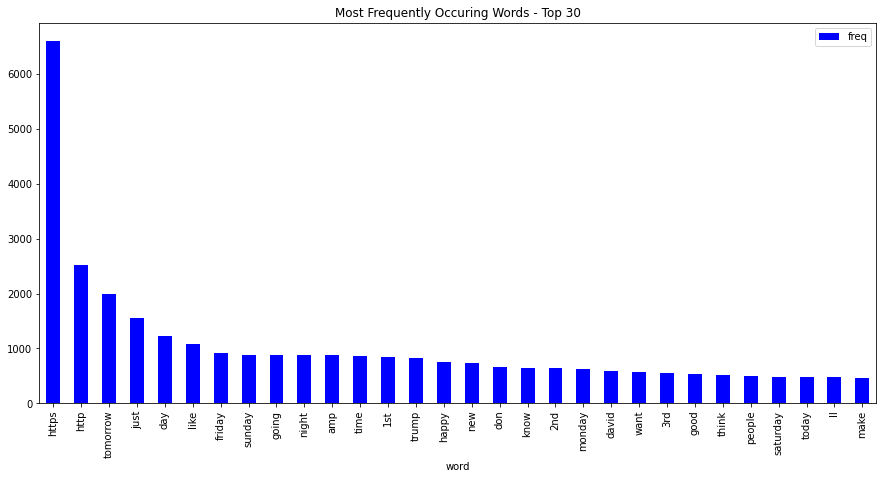

In [32]:
cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

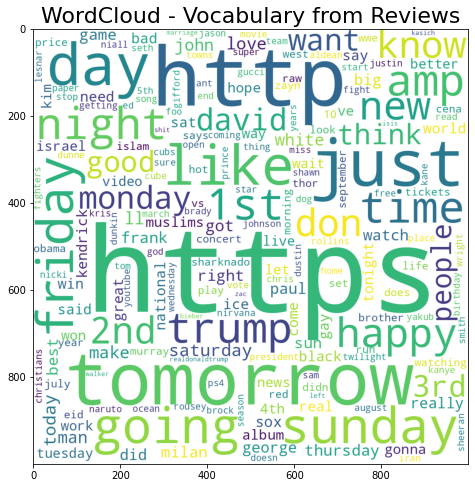

In [33]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)

plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

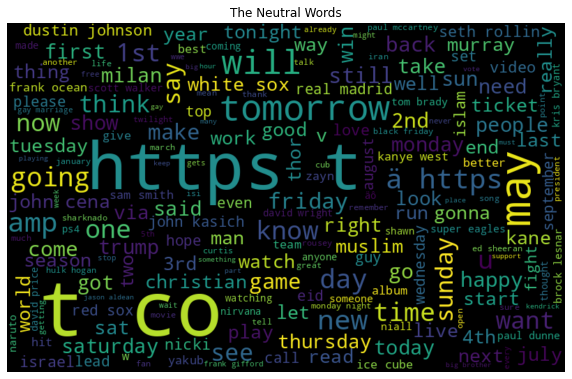

In [34]:
neutral_words =' '.join([text for text in train['text'][train['sentiment'] == 'neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(neutral_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

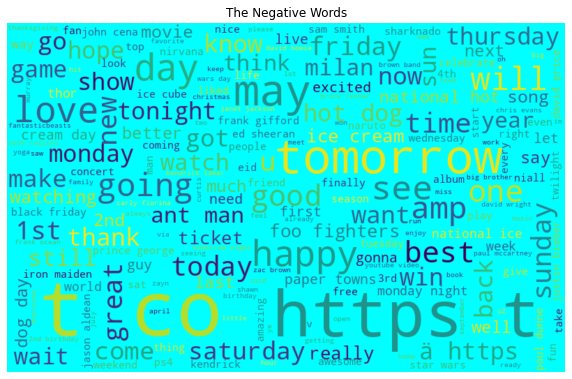

In [35]:
positive_words =' '.join([text for text in train['text'][train['sentiment'] == 'positive']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(positive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

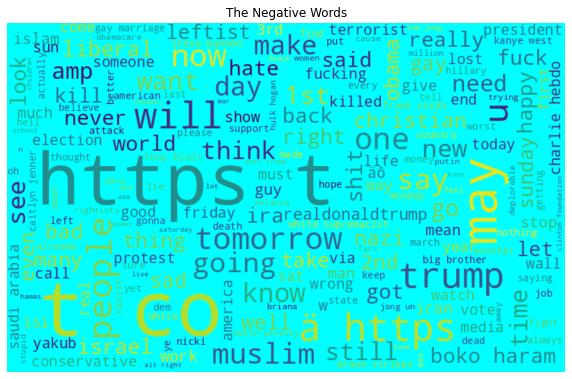

In [36]:
negative_words =' '.join([text for text in train['text'][train['sentiment'] == 'negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [37]:
# collecting the hashtags
import re
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [38]:
HT_positive = hashtag_extract(train['text'][train['sentiment'] == 'positive'])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['text'][train['sentiment'] == 'negative'])
HT_neutral = hashtag_extract(train['text'][train['sentiment'] == 'neutral'])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])
HT_neutral = sum(HT_neutral,[])

In [39]:
import nltk
print(HT_negative)
print(HT_positive)
print(HT_neutral)

['aleppo', 'syria', 'standwithaleppo', 'leftists', 'yemen', 'yakubdebate', 'jocox', 'hamas', 'fabian', 'hoax', 'brexitthe', 'remain', 'trump', 'punchnews', 'recount', 'blissfulignorance', 'ge16', 'sinnfein', 'vinb', 'palestine', 'thewalkingdead', 'finalsweek', 'usopen', 'summerslam', 'hypocrites', 'thewalkingdead', 'mannequinchallenge', 'apartheid', 'parisattacks', 'isis', 'falseflag', 'cia', 'mossad', 'israel', 'curtschilling', 'billgates', 'nwo', 'depopulation', 'gmo', 'trumptransitionteam', 'uber', 'brta', 'dhaka', 'trumptransition', 'deplorables', 'lies', 'establishment', 'xfactorliveshows', 'landingteams', 'awayteam', 'trumptransitionteam', 'yemenfiles', 'yemencrisis', 'afcon_2017_qualifier', 'iraq2003', 'foxnews', 'trump', 'kremlintrolls', 'mh17', 'hamas', 'israel', 'nbawards', 'georgesoros', 'video', 'sallyfields', 'jerusalem', 'palestine', 'israel', 'bds', 'gaza', 'beashamed', 'filibusting', 'thatisall', 'bermanhasnopower', 'renzi', 'assad', 'saudihellabia', 'syria', 'yemen', '

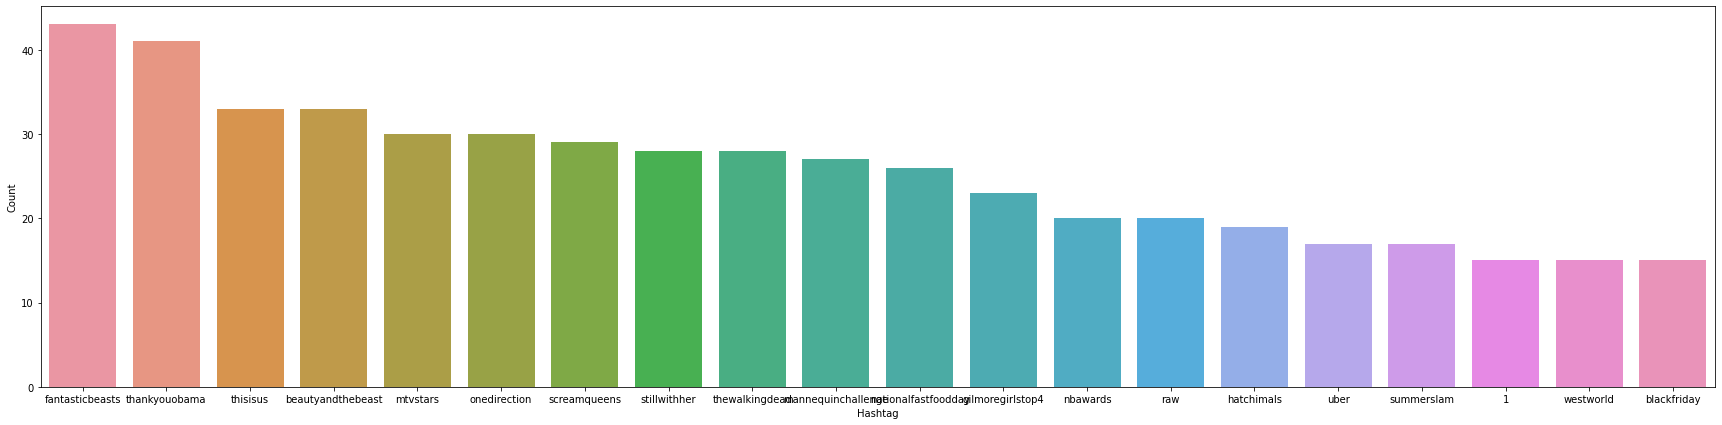

In [40]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(30,7))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

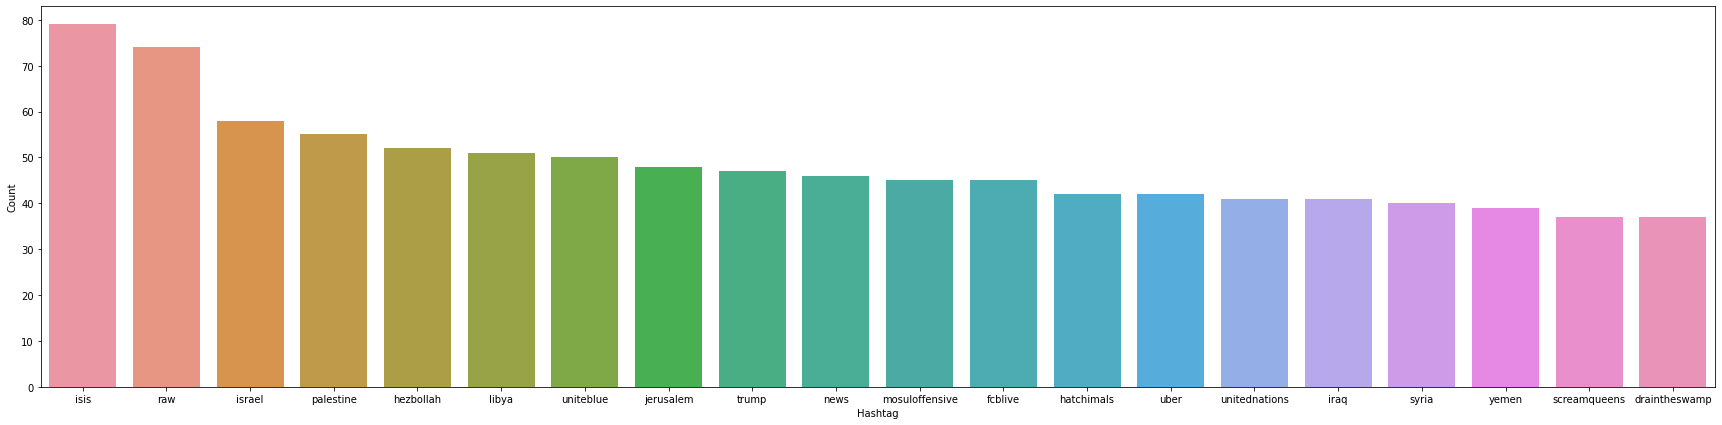

In [41]:
a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(30,7))
ax = sns.barplot(data=d,x="Hashtag", y = "Count")
ax.set(ylabel="Count")
plt.show()


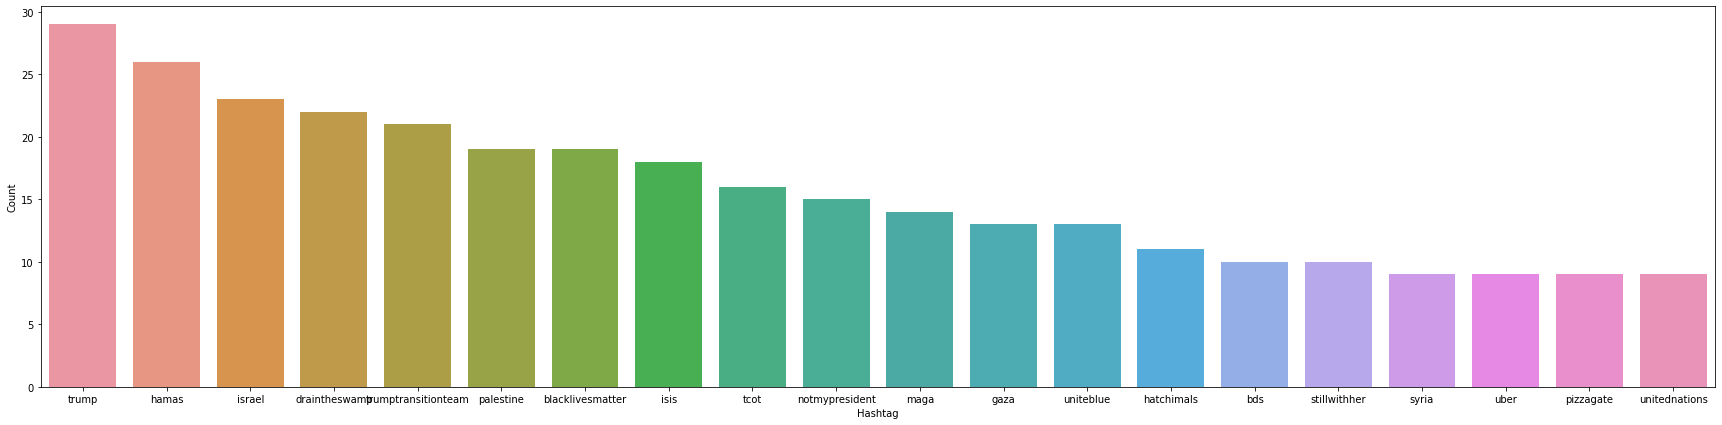

In [42]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

d = d.nlargest(columns="Count", n = 20)
plt.figure(figsize=(30,7))
ax = sns.barplot(data=d,x="Hashtag", y = "Count")
ax.set(ylabel="Count")
plt.show()


In [43]:
tokenized_tweet = train['text'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['text']), epochs=50)
model_w2v.save('model_22_4.model')

In [44]:
model_w2v.wv.most_similar(positive = "apple")

[('cider', 0.5732164978981018),
 ('emoji', 0.5031692385673523),
 ('prank', 0.46689435839653015),
 ('rs.', 0.4454874098300934),
 ('lady..', 0.4381829500198364),
 ('@dunkindonuts', 0.4344443380832672),
 ('flipkart', 0.4333536624908447),
 ('app', 0.43065619468688965),
 ('app,', 0.42535871267318726),
 ('nabs', 0.41700828075408936)]

In [45]:
model_w2v.wv.most_similar(positive = "hate")

[('believe.', 0.46975773572921753),
 ('grade?', 0.4625355303287506),
 ('breeds', 0.45280721783638),
 ('mondays.', 0.44553956389427185),
 ('cry.', 0.44250306487083435),
 ('heart!', 0.44214990735054016),
 ('@jack', 0.4355500042438507),
 ('@latinaafortrump', 0.42996785044670105),
 ('"most', 0.41623619198799133),
 ('@amazon', 0.4158467948436737)]

In [46]:
model_w2v.wv.most_similar(positive = "love")

[('affair', 0.4355621039867401),
 ('victims.rightists', 0.420411616563797),
 ('it!!!!', 0.4139901399612427),
 ('ignition', 0.41069555282592773),
 ('much!', 0.40012139081954956),
 ('""first', 0.39991098642349243),
 ('you.""', 0.3968357741832733),
 ('happiness', 0.3931966722011566),
 ('much,', 0.38858962059020996),
 ('seemingly', 0.3877478837966919)]

In [47]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

In [48]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["text_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

[TaggedDocument(words=['doctors', 'hit', 'campaign', 'trail', 'as', 'race', 'to', 'medical', 'council', 'elections', 'heats', 'up', 'https://t.co/iifdwb9v0w', '#homeopathy'], tags=['text_0']),
 TaggedDocument(words=['is', 'anybody', 'going', 'to', 'the', 'radio', 'station', 'tomorrow', 'to', 'see', 'shawn?', 'me', 'and', 'my', 'friend', 'may', 'go', 'but', 'we', 'would', 'like', 'to', 'make', 'new', 'friends/meet', 'there', '(:'], tags=['text_1']),
 TaggedDocument(words=['i', 'just', 'found', 'out', 'naruto', "didn't", 'become', 'the', '5th', 'hokage....'], tags=['text_2']),
 TaggedDocument(words=['"prince', 'george', 'reservist', 'who', 'died', 'saturday', 'just', 'wanted', 'to', 'help', 'people,', 'his', 'father', 'tells', '@cbcnews', 'http://t.co/riauzrjgre"'], tags=['text_3']),
 TaggedDocument(words=['season', 'in', 'the', 'sun', 'versi', 'nirvana', 'rancak', 'gak..slow', 'rockkk...'], tags=['text_4']),
 TaggedDocument(words=['if', 'i', 'didnt', 'have', 'you', "i'd", 'never', 'see'

In [49]:
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /home/sol/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
train_corpus = []

for i in range(0, len(train['text'])):
  review = re.sub('[^a-zA-Z]', ' ', train['text'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [51]:
test_corpus = []

for i in range(0, len(test['text'])):
  review = re.sub('[^a-zA-Z]', ' ', test['text'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(21802, 2500)
(21802,)


In [53]:

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(6099, 2500)


In [54]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(16351, 2500)
(5451, 2500)
(16351,)
(5451,)


In [55]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)


In [56]:
print(x_train)

[[-0.03319734 -0.0351409  -0.05311516 ... -0.09134835 -0.028208
  -0.02927372]
 [-0.03319734 -0.0351409  -0.05311516 ... -0.09134835 -0.028208
  -0.02927372]
 [-0.03319734 -0.0351409  -0.05311516 ... -0.09134835 -0.028208
  -0.02927372]
 ...
 [-0.03319734 -0.0351409  -0.05311516 ... -0.09134835 -0.028208
  -0.02927372]
 [-0.03319734 -0.0351409  -0.05311516 ... -0.09134835 -0.028208
  -0.02927372]
 [-0.03319734 -0.0351409  -0.05311516 ... -0.09134835 -0.028208
  -0.02927372]]


In [57]:
print(x_valid)

[[-0.03319734 -0.0351409  -0.05311516 ... -0.09134835 -0.028208
  -0.02927372]
 [-0.03319734 -0.0351409  -0.05311516 ... -0.09134835 -0.028208
  -0.02927372]
 [-0.03319734 -0.0351409  -0.05311516 ... -0.09134835 -0.028208
  -0.02927372]
 ...
 [-0.03319734 -0.0351409  -0.05311516 ... -0.09134835 -0.028208
  -0.02927372]
 [-0.03319734 -0.0351409  -0.05311516 ... -0.09134835 -0.028208
  -0.02927372]
 [-0.03319734 -0.0351409  -0.05311516 ... -0.09134835 -0.028208
  -0.02927372]]


In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, f1_score


# classifier = RandomForestClassifier()
# classifier.fit(x_train, y_train)
# y_pred = classifier.predict(x_valid)

# print("Training Accuracy: ", classifier.score(x_train, y_train))
# print("Validation Accuracy: ", classifier.score(x_valid, y_valid ))
# # print("F1 score: ", f1_score(y_valid, y_pred))
# cm = confusion_matrix(y_valid, y_pred)
# print(cm)

In [59]:
# from sklearn.linear_model import LogisticRegression
# regresser = LogisticRegression()
# regresser.fit(x_train, y_train)
# y_pred = regresser.predict(x_valid)
# print("Training accuracy: ", regresser.score(x_train, y_train))
# print("Validation accuracy: ", regresser.score(x_valid, y_valid))
# print("F1 score: ", f1_score(y_valid, y_pred))
# cm = confusion_matrix(y_valid, y_pred)
# print("Confusion matrix: ", cm)

In [60]:
# from sklearn.ensemble import VotingClassifier
# from sklearn.linear_model import LogisticRegression
# clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
# clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
# voting_classifer = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2)], voting='hard')
# voting_classifer.fit(x_train, y_train)
# y_pred = voting_classifer.predict(x_valid)
# print('Training accuracy: ', voting_classifer.score(x_train, y_train))
# print("Accuracy validation: ", voting_classifer.score(x_valid, y_valid))
# print(confusion_matrix(y_valid, y_pred))